In [1]:
using PyPlot, SparseArrays, LinearAlgebra

In [2]:
const a = 3.8
f(x) = a*x*(1-x)
# f(x) = (1-a/2*abs(x-0.5))
disc(y) = sqrt(1+4y/a)
v1(y) = (1-disc(y))/2
v2(y) = (1+disc(y))/2
jv(y) = 1/disc(y)

jv (generic function with 1 method)

In [20]:
getind(x,N) = max(ceil(Int,x*N),1)

function gibbsmeasure(N,expφ)
    I = Int[]
    J = Int[]
    W = Float64[]
    for i = 1:N
        xl = (i-1)/N; xu = i/N
        yl = f(xl < 0.5 ? xl : xu); indl = getind(yl,N)
        yu = f(xl < 0.5 ? xu : xl); indu = getind(yu,N)
        @assert yl < yu
        wdth = yu-yl; grad = wdth*N
        wt = expφ((xl+xu)/2,grad)*grad
        if indl == indu
            push!(I,i); push!(J,indl); push!(W,wt)
        else
            push!(I,i); push!(J,indl); push!(W,wt*(indl/N-yl)/wdth)
            for ind = indl+1:indu-1
                push!(I,i); push!(J,ind); push!(W,wt/N/wdth)
            end
            push!(I,i); push!(J,indu); push!(W,wt*(yu-(indu-1)/N)/wdth)
        end
    end
    L = sparse(J,I,W,N,N)
    r = ones(N)
    l = ones(N)
    for i = 1:100
        r = L*r
        l = L'*l
        r /= sum(r)
        l /= dot(r,l)
    end
    expP = sum(L*r)/sum(r)
    @assert maximum(abs.(L*r - expP*r)) < 1e-10
    return expP, (r.*l)*N
end
gibbsmeasure(N;s=1) = gibbsmeasure(N,(x,df) -> df^(-s))

gibbsmeasure (generic function with 2 methods)

In [52]:
s = 0; N = 10000
expP, μ = gibbsmeasure(N,s=s)
bar((1:2:2N)/2N,μ,width=1/N)
ylim(ymin=0); xlim(0,1)
title("\$s = $s\$, \$P(-s\\, \\log |f'|) = $(string(round(log(expP),digits=4)))\$")
xlabel("\$x\$"); ylabel("Measure");
tight_layout()

d_H = 0.9432011781501228


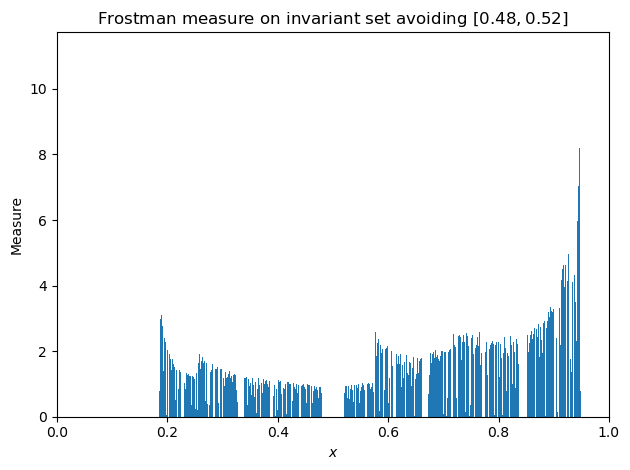

In [79]:
using Roots
horseshoedim = fzero(s->gibbsmeasure(N,(x,df) -> (abs(x-0.5)>0.02) * df^(-s))[1]-1,1)
expP_horseshoe, μ_horseshoe = gibbsmeasure(N,(x,df) -> (abs(x-0.5)>0.02)* df^(-horseshoedim))
bar((1:2:2N)/2N,μ_horseshoe,width=1/N)
title("Frostman measure on invariant set avoiding \$[0.48,0.52]\$")
xlabel("\$x\$"); ylabel("Measure");
ylim(ymin=0); xlim(0,1)
tight_layout()
println("d_H = ",horseshoedim)

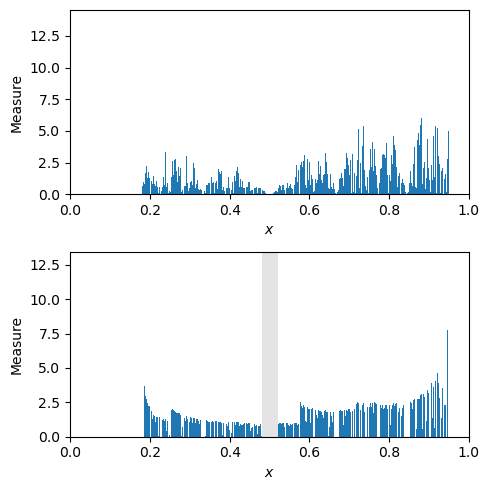

In [89]:
figure(figsize=(5,5))
subplot(211)
bar((1:2:2N)/2N,μ,width=1/N)
ylim(0,1.2maximum(μ)); xlim(0,1)
xlabel("\$x\$"); ylabel("Measure");
subplot(212)
bar((1:2:2N)/2N,μ_horseshoe,width=1/N)
ymax = 1.2maximum(μ_horseshoe)
fill_between([0.48,0.52],[0,0],[ymax,ymax],fc="lightgrey",alpha=0.6)
ylim(0,ymax); xlim(0,1)
xlabel("\$x\$"); ylabel("Measure");
tight_layout()
savefig("../figures/Logistic")

In [76]:
println("d_H = ",horseshoedim)

d_H = 0.9432011781501228
